# Loan Prediction using Neural Network

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
os.chdir("C:/Users/hp/Desktop/Python Classess/Deep Learning/Project_II_end_to_end")

In [3]:
import pandas as pd
A = pd.read_csv("training_set.csv")

In [4]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from PM8wd import replacer
replacer(A)

In [7]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

In [8]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural


In [9]:
X.shape

(614, 11)

In [10]:
Y.shape

(614, 1)

In [11]:
from PM8wd import catconsep 
cat,con= catconsep(X)

In [12]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [13]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Y.Loan_Status= le.fit_transform(Y)

In [15]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2= pd.get_dummies(X[cat])
Xnew= X1.join(X2)

In [16]:
Xnew.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.45164,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.45164,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [18]:
xtrain.shape[1]

20

# create an ANN with only 1 hidden layer(untuned)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
nn= Sequential()
nn.add(Dense(128,input_dim=xtrain.shape[1]))
nn.add(Dense(20))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

In [20]:
nn.compile(loss="binary_crossentropy",metrics="accuracy")

In [21]:
model=nn.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 0.5713 - accuracy: 0.7500 - val_loss: 0.5189 - val_accuracy: 0.7879
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.8112 - val_loss: 0.4943 - val_accuracy: 0.8081
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8138 - val_loss: 0.4963 - val_accuracy: 0.7980
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.7985 - val_loss: 0.4966 - val_accuracy: 0.7980
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8112 - val_loss: 0.5082 - val_accuracy: 0.7980
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.8087 - val_loss: 0.4996 - val_accuracy: 0.7980
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.7985 - val_loss: 0.5054 - val_accuracy: 0.7980
Epoch 8/50
13/13 [=

# Tuning Grid

In [22]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(128,input_dim=xtrain.shape[1]))
    x = hp.Int("units",min_value=32,max_value=256,step=32)
    nn.add(Dense(units=x))
    y = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    nn.add(Dropout(rate=y))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [26]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
            objective="val_accuracy",
            max_epochs=10,
            directory="C:/Users/hp/Desktop/Python Classess/Deep Learning/Project_II_end_to_end/KT_NN2",
            project_name="Keras_TUNER")

In [27]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_accuracy",patience=25)

In [28]:
tuner.search(xtrain,ytrain,epochs=500,validation_split=0.2,callbacks=[es])

Trial 30 Complete [00h 00m 03s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8282828330993652
Total elapsed time: 00h 01m 06s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.get_best_hyperparameters()[0].get("units")

96

In [30]:
tuner.get_best_hyperparameters()[0].get("rate")

0.5

# Create a NN with new value of tuned parameter¶

In [32]:
nn = Sequential()
nn.add(Dense(128,input_dim=xtrain.shape[1]))
nn.add(Dense(96))
nn.add(Dropout(0.5))
nn.add(Dense(1,activation="sigmoid"))
nn.compile(loss="binary_crossentropy",metrics="accuracy",optimizer="adam")
nn.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 1s 14ms/step - loss: 0.6137 - accuracy: 0.6913 - val_loss: 0.4684 - val_accuracy: 0.8182
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4879 - accuracy: 0.7985 - val_loss: 0.4734 - val_accuracy: 0.8182
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.8010 - val_loss: 0.4889 - val_accuracy: 0.8182
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.7934 - val_loss: 0.5014 - val_accuracy: 0.8182
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.4545 - accuracy: 0.8061 - val_loss: 0.5117 - val_accuracy: 0.8081
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4864 - accuracy: 0.8010 - val_loss: 0.5182 - val_accuracy: 0.7980
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4550 - accuracy: 0.8061 - val_loss: 0.5159 - val_accuracy: 0.8081
Epoch 8/10
13/13 [=

In [33]:
tr=model.history["accuracy"]

In [34]:
ts=model.history["val_accuracy"]

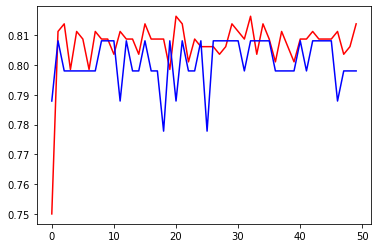

In [35]:
import matplotlib.pyplot as plt
plt.plot(tr, c= "red")
plt.plot(ts, c="blue")

In [36]:
pred=nn.predict(xtest)

4/4 [==============================] - 0s 2ms/step


In [37]:
Q=[]
for i in pred:
    if(i[0]<0.5):
        Q.append(0)
    else:
        Q.append(1)

In [39]:
#Q

In [40]:
pred1= le.inverse_transform(Q)
pred1

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [41]:
ytest1= le.inverse_transform(ytest)
ytest1

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [42]:
W=pd.DataFrame([ytest1,pred1]).T

In [44]:
#W

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest1,pred1)

0.7886178861788617

# We can see here using NN, we are not getting the accuracy score better compare to Tree model 
so we will not consider this model for making the loan predcition